In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from cv2 import imread,imwrite,resize
from skimage.feature import graycomatrix, graycoprops
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load dataset function
def load_data(root):
    dict_img = {}
    for dir in os.listdir(root):
        img = Image.open(os.path.join(root, dir, os.listdir(os.path.join(root, dir))[0]))
        print(img.size)
        dict_img[dir] = len(os.listdir(os.path.join(root, dir)))
    return dict_img


In [ ]:
#plot sample from dataset function
def plot_first_img_from_each_dir(root):
  dict_img = load_data(root)
  fig, ax = plt.subplots(1, len(dict_img), figsize=(10, 5))
  for i, dir in enumerate(dict_img):
    img = Image.open(os.path.join(root, dir, os.listdir(os.path.join(root, dir))[0]))
    ax[i].imshow(img)
    ax[i].set_title(dir)
  plt.show()


In [ ]:
#load original dataset
root =  '/content/drive/MyDrive/dataset'


(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)


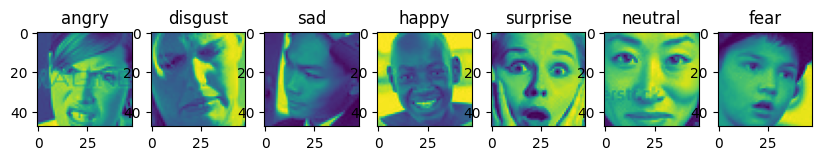

In [ ]:
#plot first image from each directory
plot_first_img_from_each_dir(root)

In [ ]:
#  copy from dataset and resize images of all folders and convert to gray
new_root = '/content/drive/MyDrive/dataset1_new'

for dir in load_data(root):
  os.makedirs(os.path.join(new_root, dir), exist_ok=True)
  for img_name in os.listdir(os.path.join(root, dir)):
    img = imread(os.path.join(root, dir, img_name))
    new_img = resize(img, (250, 250))
    new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB)
    imwrite(os.path.join(new_root, dir, img_name), new_img)


(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)
(48, 48)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


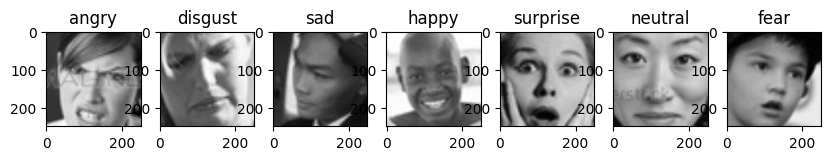

In [ ]:
plot_first_img_from_each_dir(new_root)

In [ ]:
sized="/content/drive/MyDrive/dataset1_new"
def enhance_images(root):
  new_root = '/content/drive/MyDrive/dataset_new1_enhanced'
  for dir in load_data(root):
    os.makedirs(os.path.join(new_root, dir), exist_ok=True)
    for img_name in os.listdir(os.path.join(root, dir)):
      img = imread(os.path.join(root, dir, img_name))
      #convert to grayscale
      gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #remove blur
      kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
      sharpened = cv2.filter2D(gray_img, -1, kernel)
      #convert back to rgb
      new_img = cv2.cvtColor(sharpened, cv2.COLOR_GRAY2RGB)
      imwrite(os.path.join(new_root, dir, img_name), new_img)

#call function to enhance images
enhance_images(new_root)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


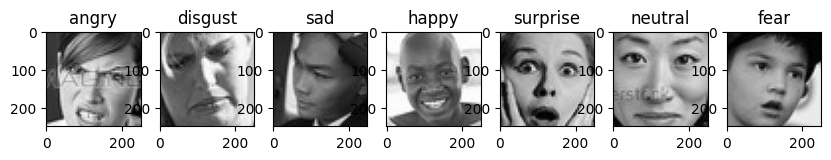

In [ ]:
plot_first_img_from_each_dir('/content/drive/MyDrive/dataset_new1_enhanced')

In [ ]:
from skimage.segmentation import slic

root = '/content/drive/MyDrive/dataset_new1_enhanced'

# perfect segmentation function by slic
def perfect_segmentation(root):
  new_root = '/content/drive/MyDrive/dataset1_new_segmented'
  for dir in load_data(root):
    os.makedirs(os.path.join(new_root, dir), exist_ok=True)
    for img_name in os.listdir(os.path.join(root, dir)):
      img = imread(os.path.join(root, dir, img_name))
      #convert to grayscale
      gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
      segments = slic(img, n_segments=12, compactness=10)
      #save segmented image
      imwrite(os.path.join(new_root, dir, img_name), segments)

#call function to segment images
perfect_segmentation(root)

(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)
(250, 250)


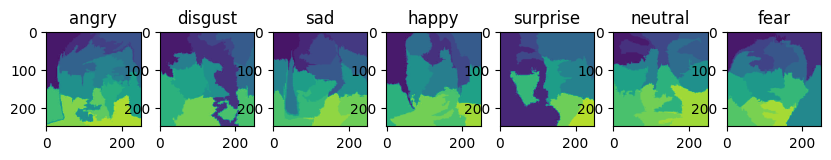

In [ ]:
plot_first_img_from_each_dir('/content/drive/MyDrive/dataset1_new_segmented')